- 어떤 규칙을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델중 직관적이고 가장 실용성이 높은 모델 중 하나
- scikit-learn의 tree 서브모듈에 DecisionTreeClassifier()

# 로지스틱 회귀로 와인 분류하기 - 화이트 와인

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.shape

(6497, 4)

In [27]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
wine['class'].unique()

array([0., 1.])

In [14]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [16]:
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
6492    11.2
6493     9.6
6494     9.4
6495    12.8
6496    11.8
Name: alcohol, Length: 6497, dtype: float64

In [25]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine[['class']].to_numpy()

In [26]:
wine_input.shape, wine_target.shape

((6497, 3), (6497, 1))

# 훈련 세트와 테스트 세트로 분리

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
wine_input, wine_target, test_size = 0.2, random_state = 42)

In [33]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 스케일링

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀 모델 구축하기

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  ## (C=20)을 통해 복잡도 조절
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_scaled, train_target)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [50]:
lr.predict(test_scaled[:5])

array([1., 1., 1., 1., 1.])

In [51]:
test_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [55]:
# 예측확률
lr.predict_proba(test_scaled[:5])

array([[0.00718937, 0.99281063],
       [0.45101583, 0.54898417],
       [0.03548741, 0.96451259],
       [0.02165086, 0.97834914],
       [0.01058457, 0.98941543]])

In [56]:
# z값 계산
decisions = lr.decision_function(test_scaled[:5])
decisions

array([4.92793584, 0.19656719, 3.30244479, 3.81082135, 4.53771694])

In [57]:
# 시그모이드 함수를 통해 확률값 추출
from scipy.special import expit

print(expit(decisions)) ## proba 결과 중 [1] 번째(양성) 컬럼의 값(확률)과 일치함

print(1 - expit(decisions)) ## proba 결과 중 [0] 번째(음성) 컬럼의 값(확률)과 일치함

[0.99281063 0.54898417 0.96451259 0.97834914 0.98941543]
[0.00718937 0.45101583 0.03548741 0.02165086 0.01058457]


## 의사결정나무

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


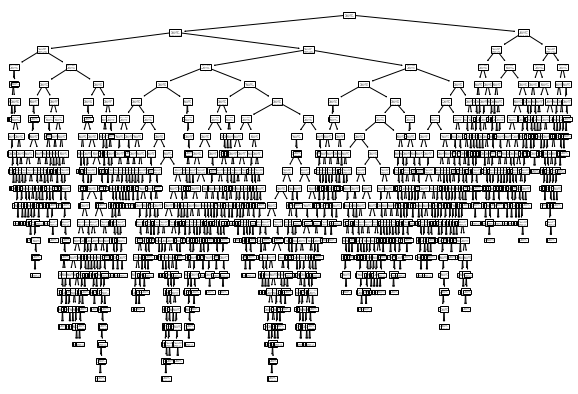

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

In [ ]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, )
plt.show()

In [ ]:
## Pruning(가지치기)
## 비용함수, 최적의 비용값(비용적합도)


## 가지치기(Pruning)
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과대적합을 방지하기 위해 사용함
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대갯수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다.

In [62]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


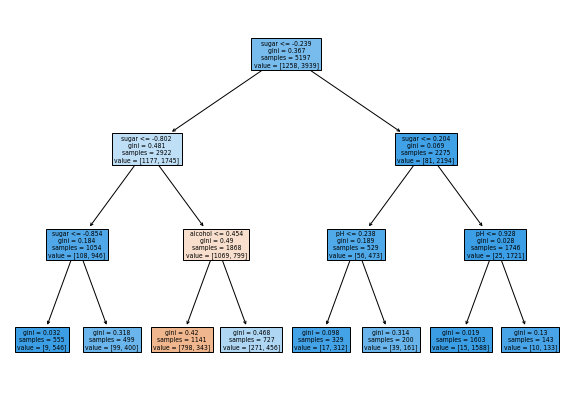

In [66]:
plt.figure(figsize = (10, 7))
plot_tree(dt,filled = True, feature_names = ['alcohol', 'sugar' , 'pH'])
plt.show()

In [78]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


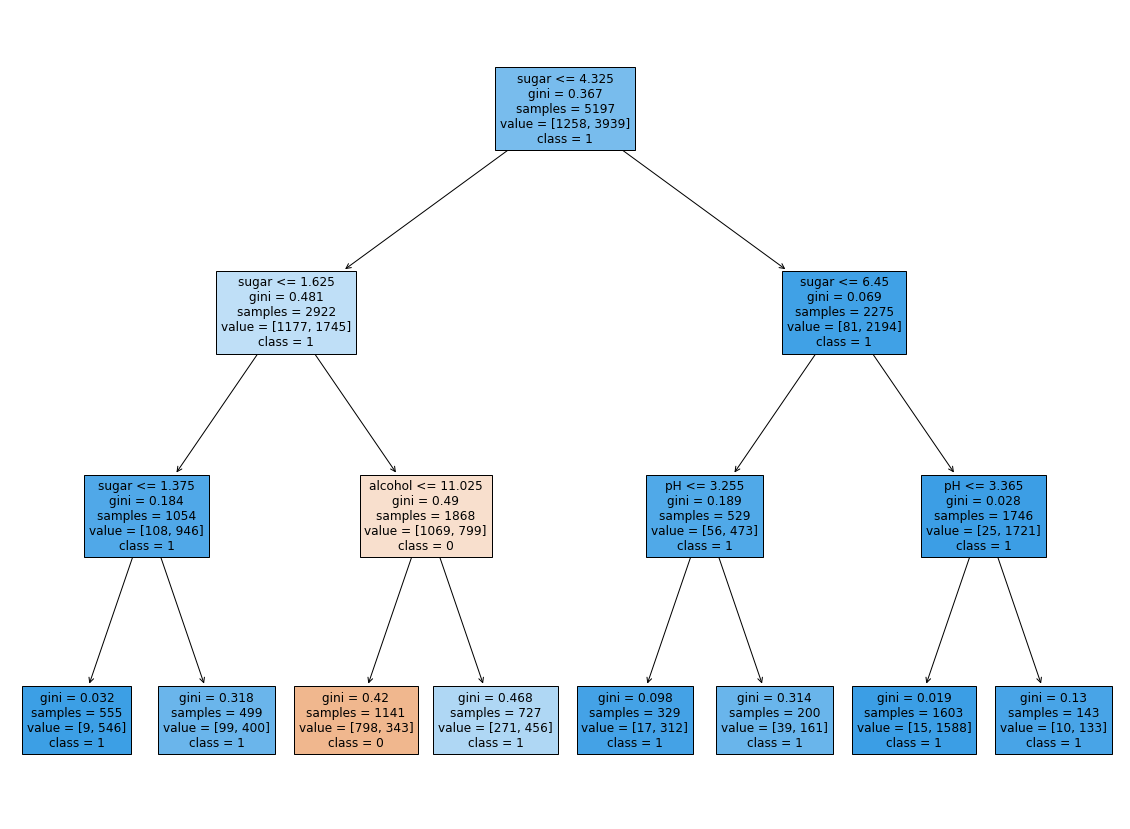

In [85]:
plt.figure(figsize = (20, 15))
plot_tree(dt,filled = True, feature_names = ['alcohol', 'sugar' , 'pH'], class_names = ['0','1'])
plt.show()

In [79]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해준다.
dt.feature_importances_    ## alcohol, sugar, pH 순으로 중요도 출력

array([0.12345626, 0.86862934, 0.0079144 ])

In [75]:
## 상대적으로 중요도가 작은 'pH'를 제거하고 재분석 가능

In [80]:
class_names=['0', '1']

In [81]:
class_names

['0', '1']